The Sparks Foundation - Data Science & Business Analytics

Perform Task#4 **'EDA Terrorism'**

Data Set can be found on Dataset: https://bit.ly/2TK5Xn5

Author -- **Sameh Farouk**

In [1]:
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')


In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH ='/content/drive/MyDrive/Colab Notebooks/datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv(DATA_PATH+'globalterrorismdb_0718dist.csv',encoding="latin",low_memory=False)


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
col =['iyear', 'imonth', 'iday','country_txt', 'region_txt','city', 'latitude', 'longitude'
      , 'attacktype1_txt','targtype1_txt', 'target1','gname'
      ,'weaptype1_txt','nkill','nwound']

In [8]:
df1 = df[col].copy()

In [9]:
df1.rename(columns ={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                     'attacktype1_txt':'attacktype','targtype1_txt':'targtype','target1':'target','weaptype1_txt':'weaptype'},inplace=True)

In [10]:
df1.head()

,year,month,day,country,region,city,latitude,longitude,attacktype,targtype,target,gname,weaptype,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Incendiary,NaN,NaN


### add casualities column (nkill + nwound)

In [11]:
df1['casualities']=df1['nkill']+df1['nwound']

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   attacktype   181691 non-null  object 
 9   targtype     181691 non-null  object 
 10  target       181055 non-null  object 
 11  gname        181691 non-null  object 
 12  weaptype     181691 non-null  object 
 13  nkill        171378 non-null  float64
 14  nwound       165380 non-null  float64
 15  casualities  164817 non-null  float64
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [13]:
df1.isna().sum()

year               0
month              0
day                0
country            0
region             0
city             434
latitude        4556
longitude       4557
attacktype         0
targtype           0
target           636
gname              0
weaptype           0
nkill          10313
nwound         16311
casualities    16874
dtype: int64

In [14]:
print('Country with Highest Terrorist Attacks:',df1['country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df1['region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df1['nkill'].max(),'that took place in',df1.loc[df1['nkill'].idxmax()].country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


waht is the number of terrorism in each year

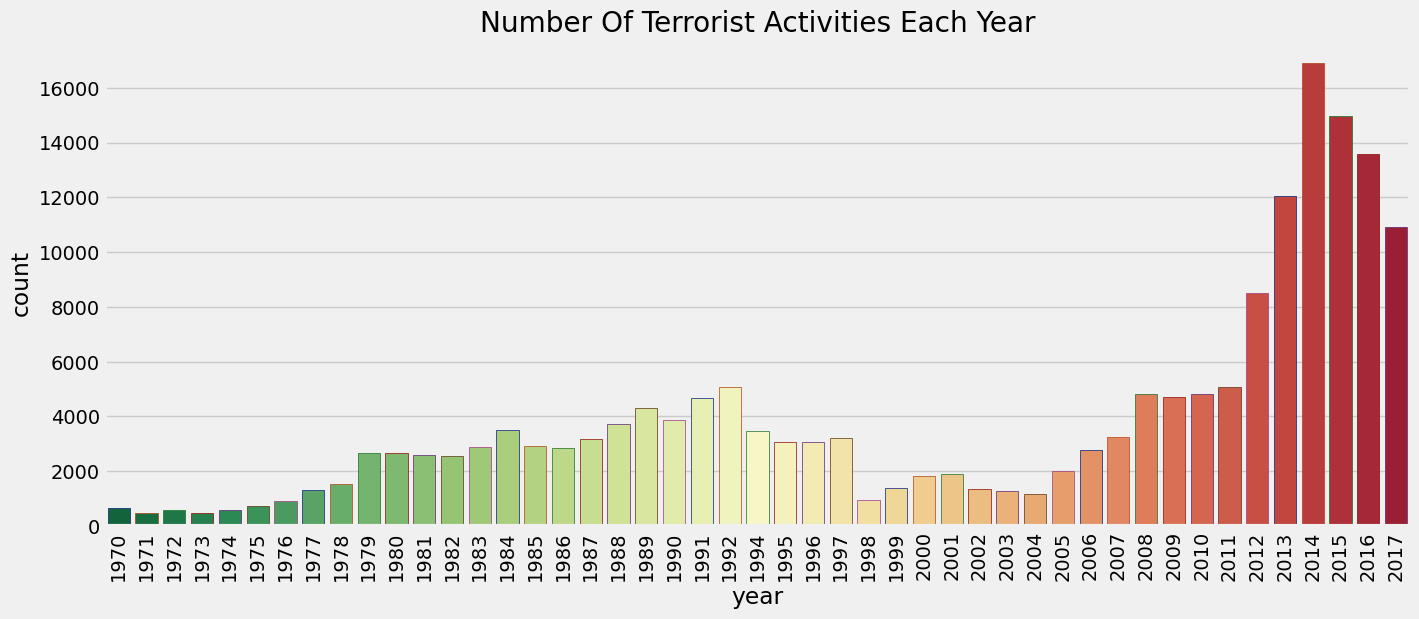

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(x=df1['year'],palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


### Clearly the number of terrorist activities have gone up sharply after 2008.


Top Affected Countries in 2014



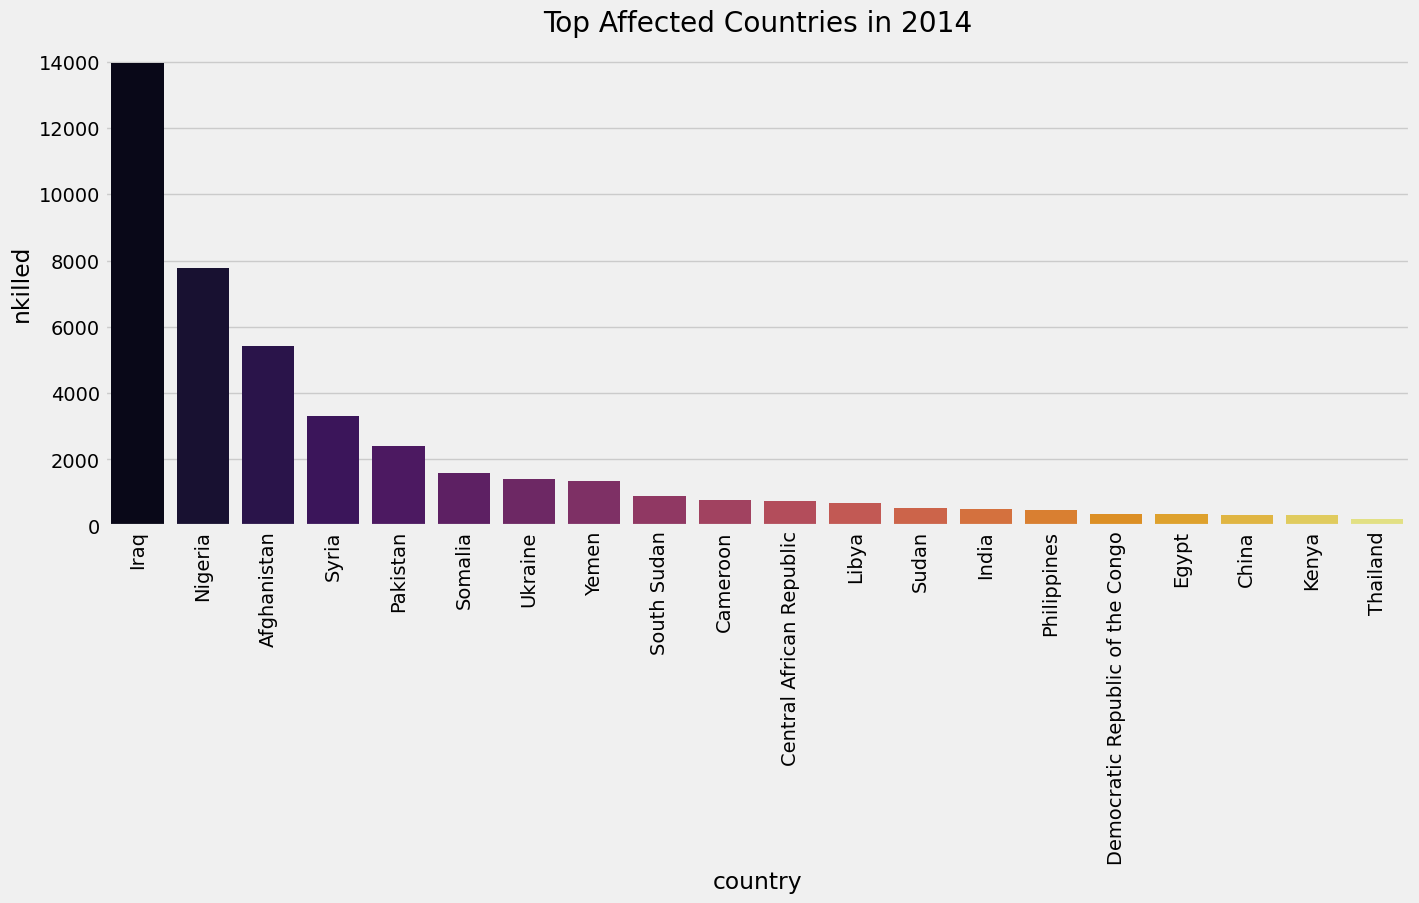

In [16]:
plt.subplots(figsize=(15,6))
nkill_2014 = df1[df1['year']==2014].groupby(['country']).apply(lambda x :x['nkill'].sum()).reset_index(name='nkilled').sort_values(by='nkilled',ascending=False)[:20]
sns.barplot(x=nkill_2014['country'],y=nkill_2014['nkilled'],palette='inferno')
plt.xticks(rotation=90)
plt.title('Top Affected Countries in 2014')
plt.show()

### Best attaking type





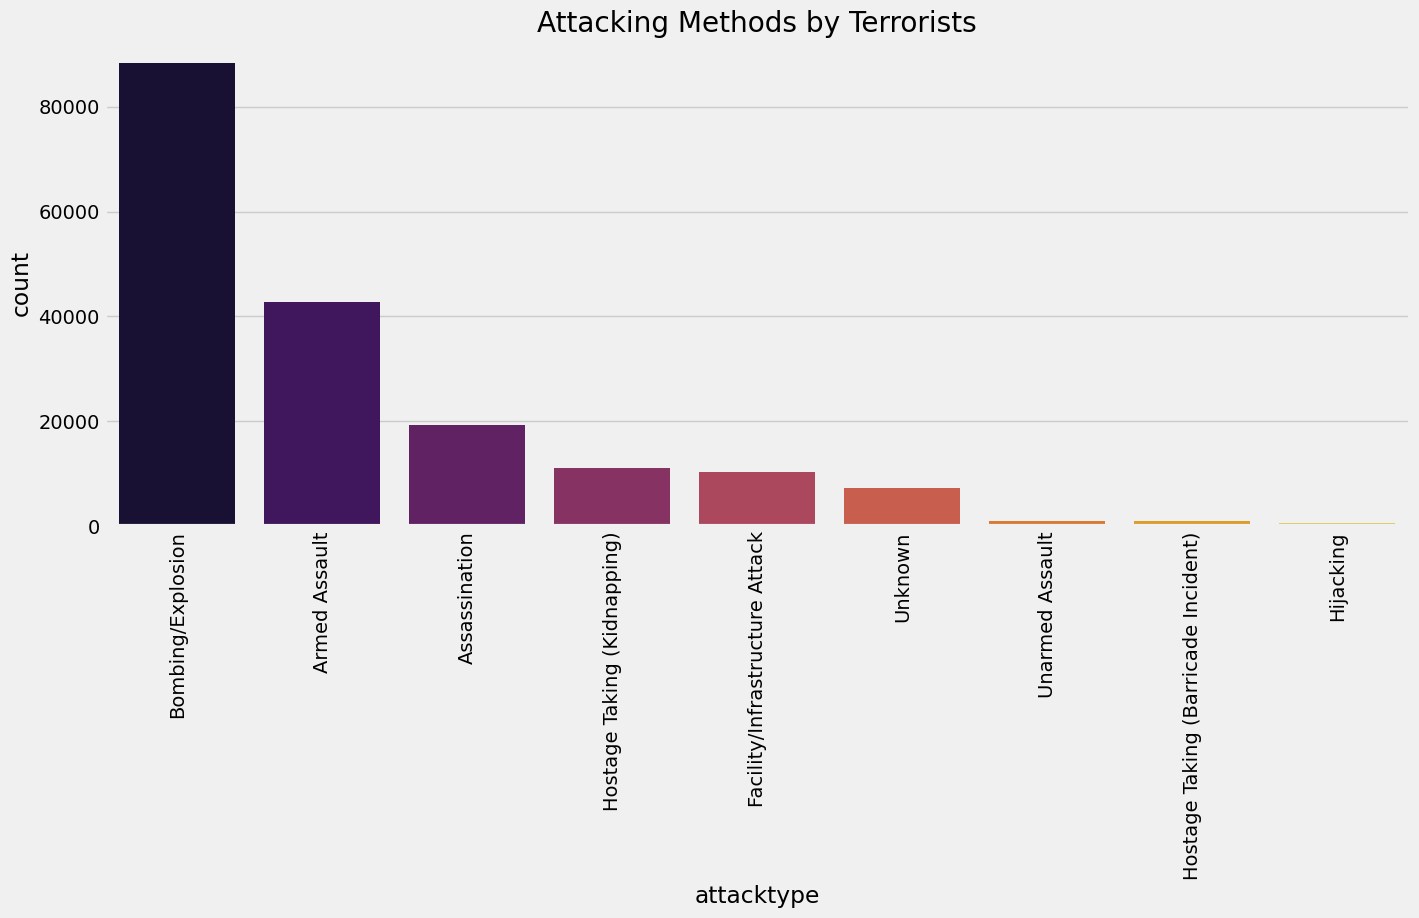

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot(x='attacktype',data=df1,palette='inferno',order=df1['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

### Best target type


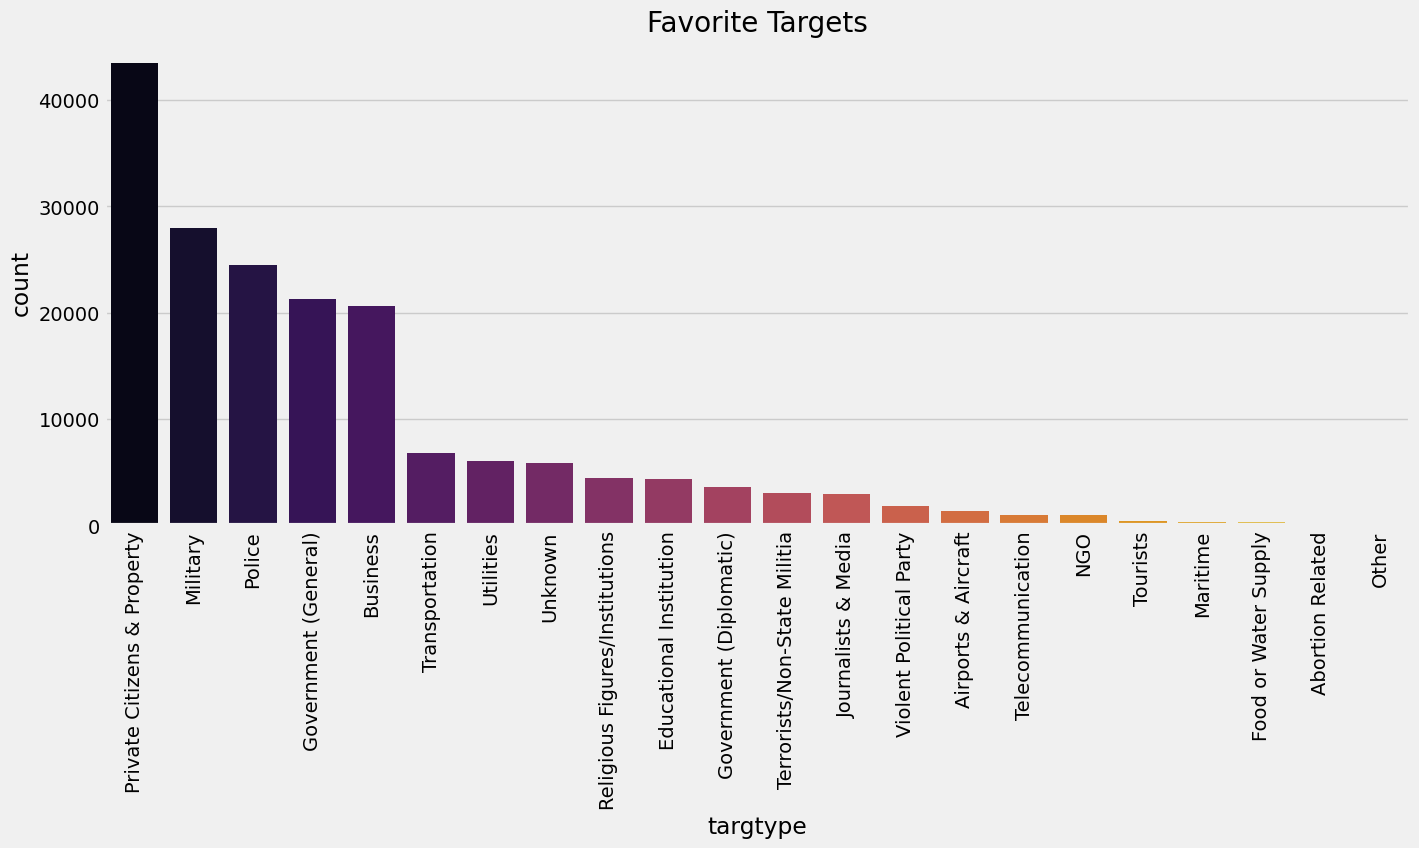

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(x='targtype',data=df1,palette='inferno',order=df1['targtype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<ipython-input-19-da8a64c9d2c2>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
<ipython-input-19-da8a64c9d2c2>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  m3.plot(x_100, y_100,'go',markersize=2,color = 'b',alpha=0.3)


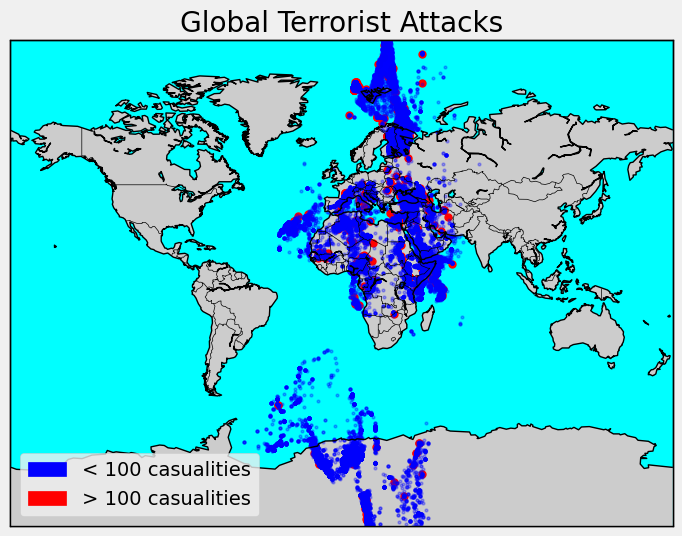

In [19]:
m3 = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(df1[df1['casualities'] >=100].latitude)
long_100=list(df1[df1['casualities'] >=100].longitude)
x_100 , y_100 = m3(lat_100,long_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(df1[df1['casualities'] <100].latitude)
long_=list(df1[df1['casualities'] <100].longitude)
x_100 , y_100 = m3(lat_,long_)
m3.plot(x_100, y_100,'go',markersize=2,color = 'b',alpha=0.3)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 100 casualities"),
                    mpatches.Patch(color='red',label='> 100 casualities')])
plt.show()


### Most terrorism Region

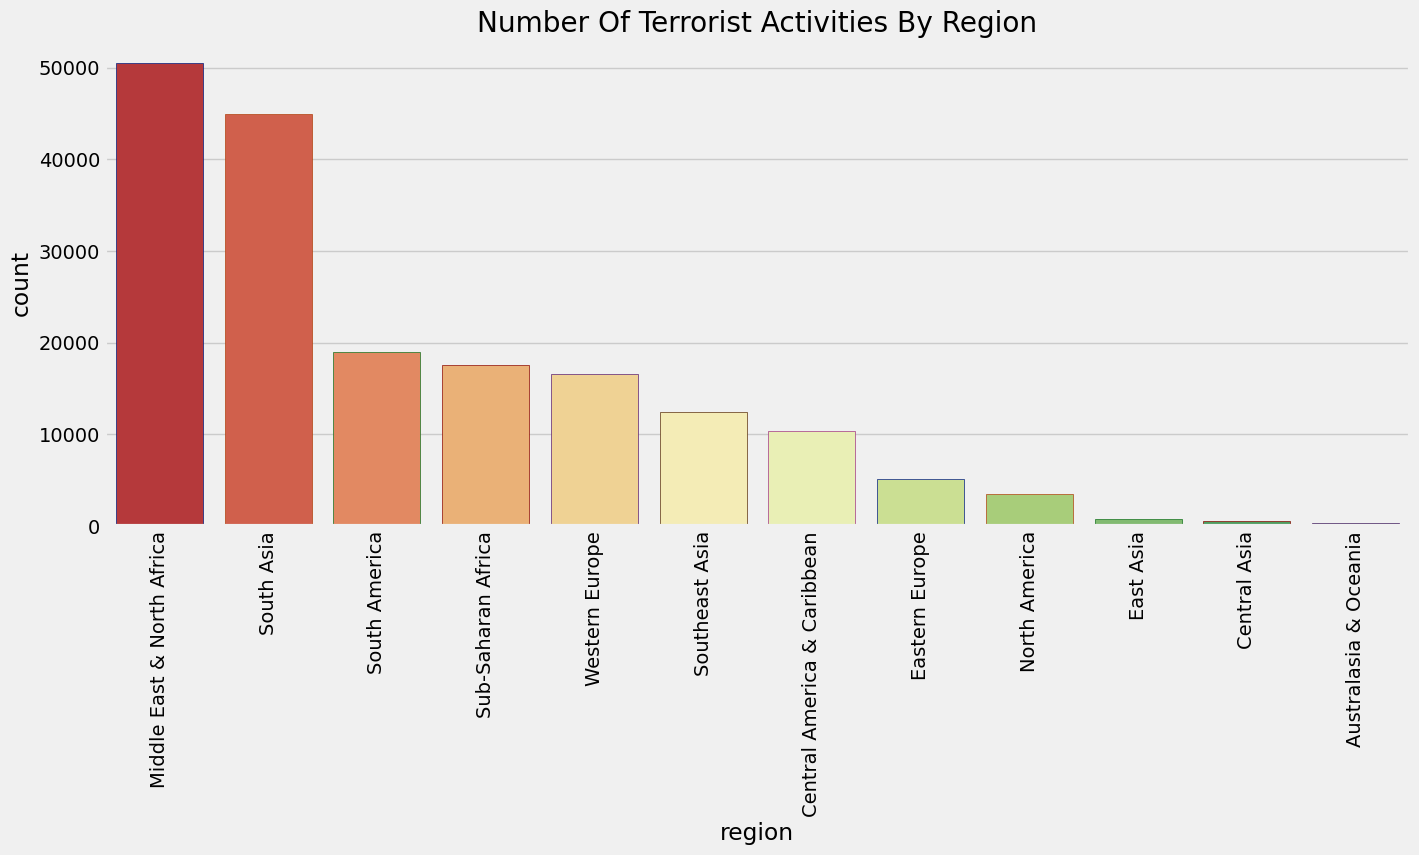

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot(x='region',data=df1,palette='RdYlGn',order=df1['region'].value_counts().index,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks.


### TargetType vs Region



In [21]:
max_targtype = df1.groupby('region')['targtype'].apply(lambda x: x.value_counts().idxmax())
max_targtype_count = df1.groupby('region')['targtype'].apply(lambda x: x.value_counts().max())

result = pd.DataFrame({'max_targtype': max_targtype, 'max_targtype_count': max_targtype_count})
result

,max_targtype,max_targtype_count
region,,
Australasia & Oceania,Government (General),52
Central America & Caribbean,Military,3065
Central Asia,Government (General),126
East Asia,Transportation,148
Eastern Europe,Military,1136
Middle East & North Africa,Private Citizens & Property,15257
North America,Business,905
South America,Business,3494
South Asia,Private Citizens & Property,10491


### Most target attacked in africa and asia is Private Citizens & Property


### AttackType vs Region


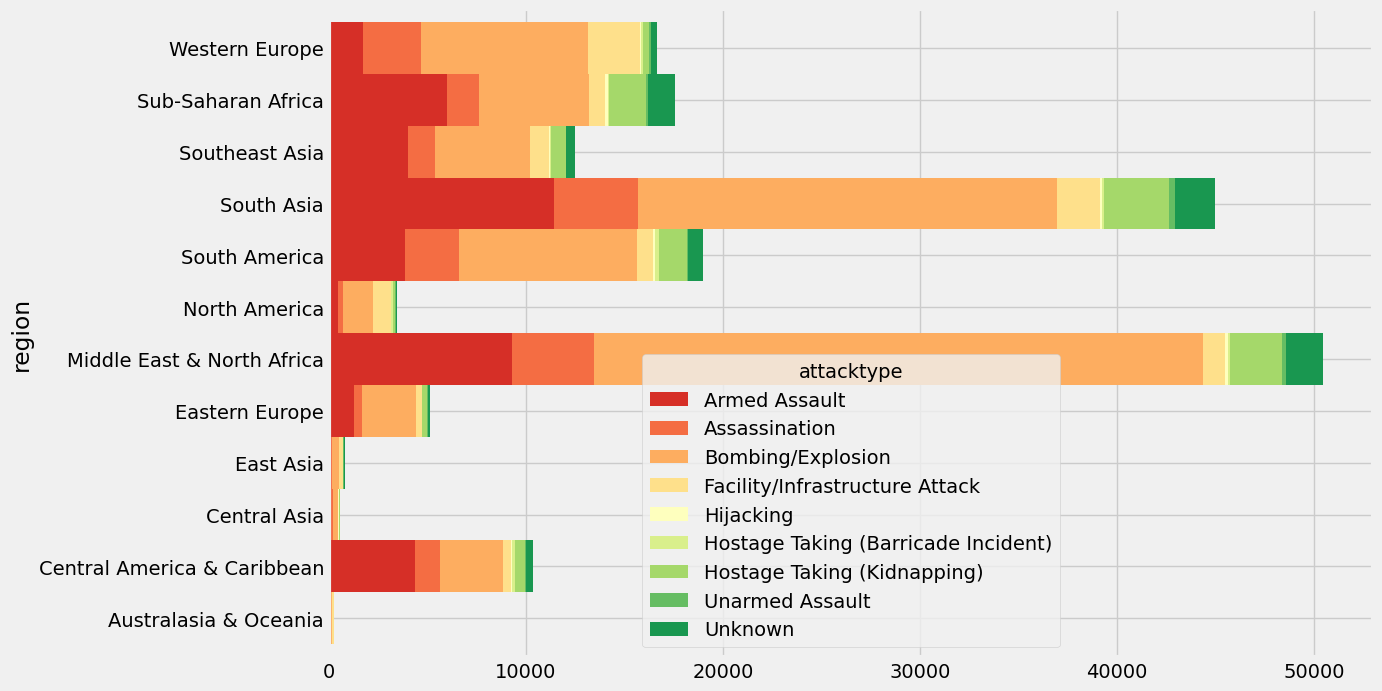

In [22]:
pd.crosstab(df1.region,df1.attacktype).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


### Top Affected Countries


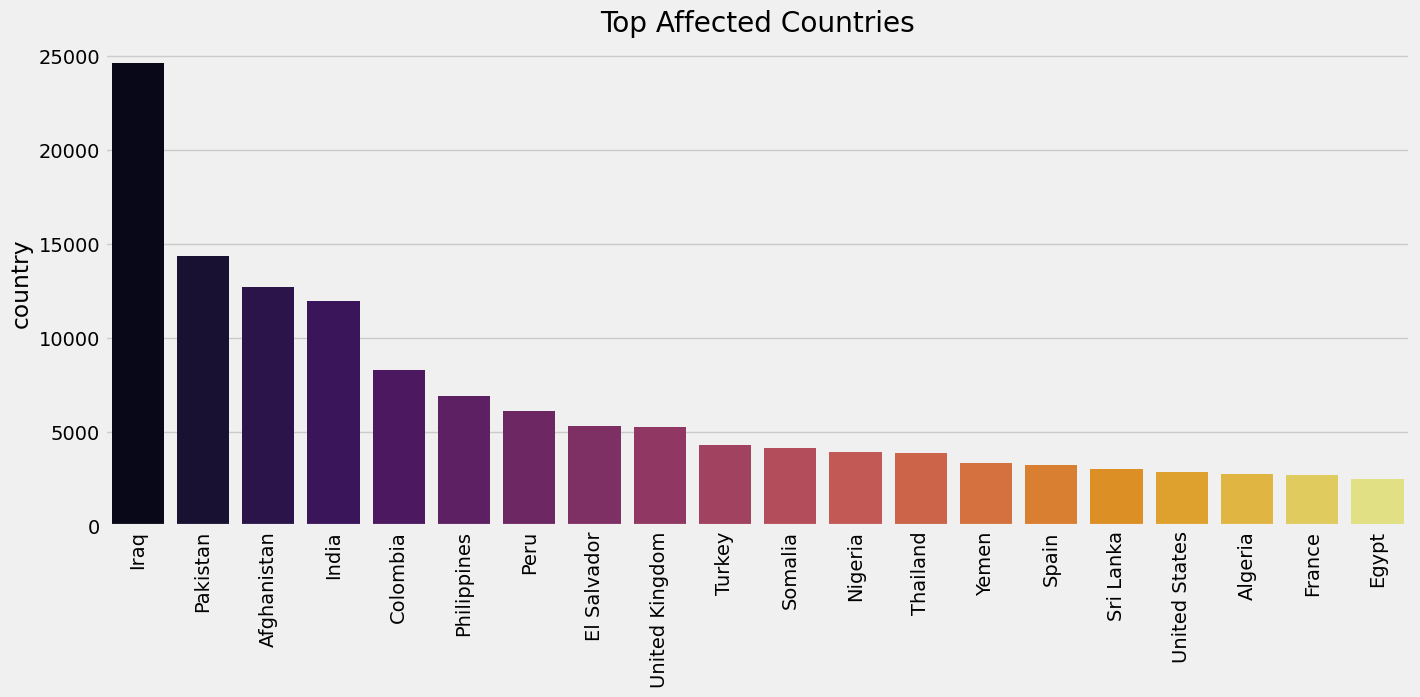

In [23]:

plt.subplots(figsize=(15,6))
sns.barplot(x=df1['country'].value_counts().index[:20],y=df1['country'].value_counts()[:20],palette='inferno')
plt.xticks(rotation=90)
plt.title('Top Affected Countries')
plt.show()


Iraq has witnessed a very large number of terrorist activities followed by Pakistan.

### The number of deaths in top 10 country over years

In [36]:
top10=list(df1['country'].value_counts().index[:10])

In [37]:
dftop10=df1[df1['country'].isin(top10)]

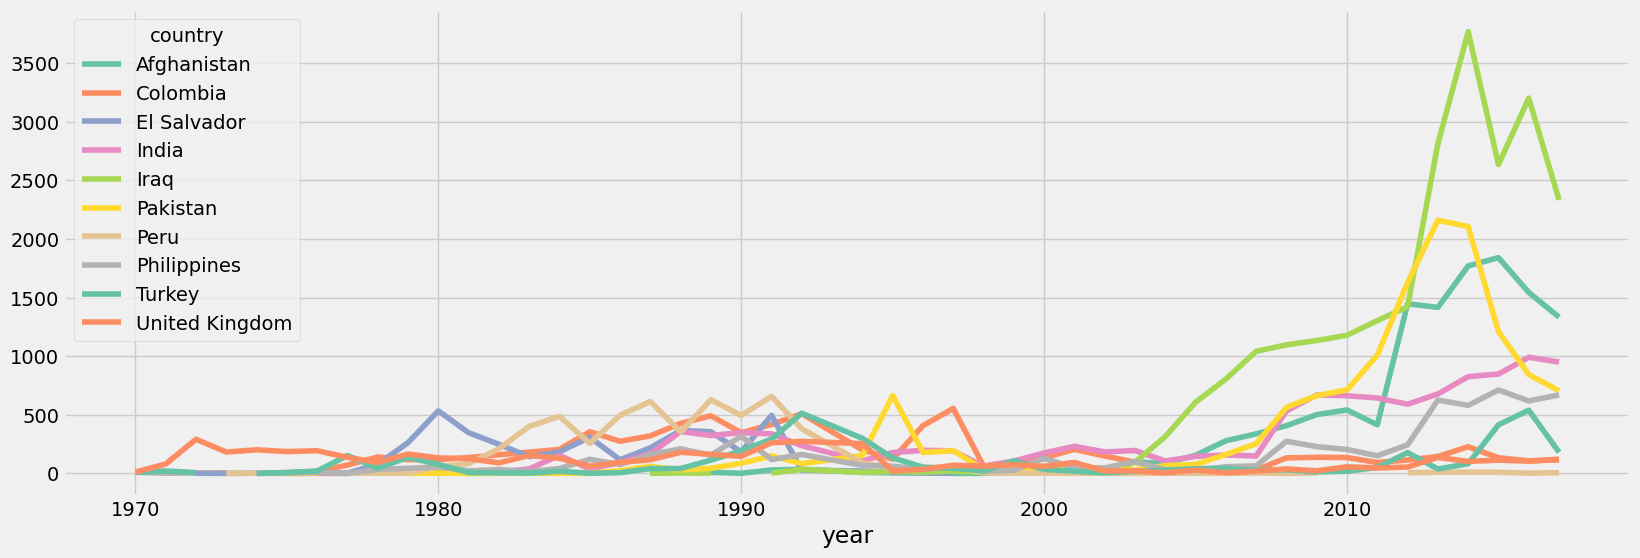

In [38]:
pd.crosstab(dftop10['year'], dftop10['country'], values=dftop10['nkill'], aggfunc='count').plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


The number of deaths increasing over years

Attacks vs Killed

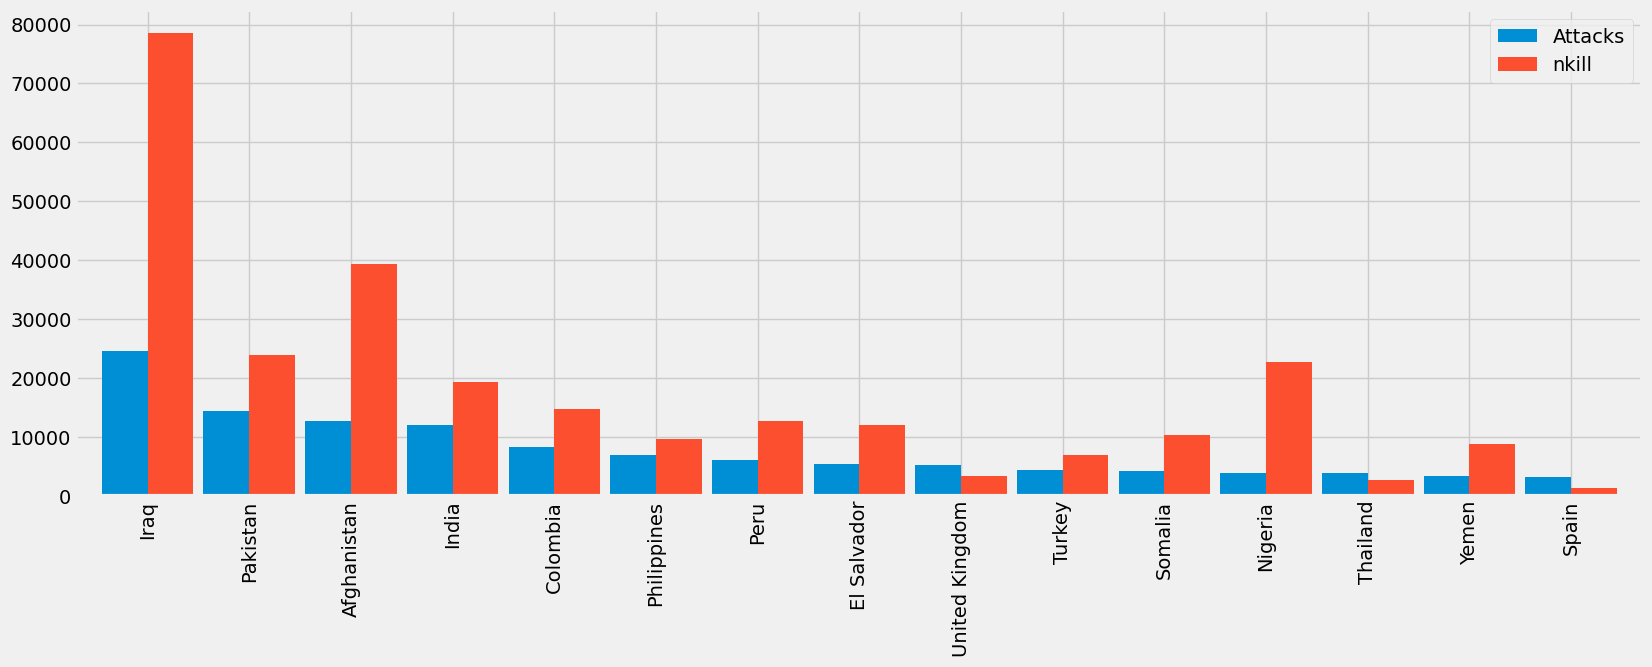

In [27]:

coun_terror=df1['country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df1.groupby('country')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq.

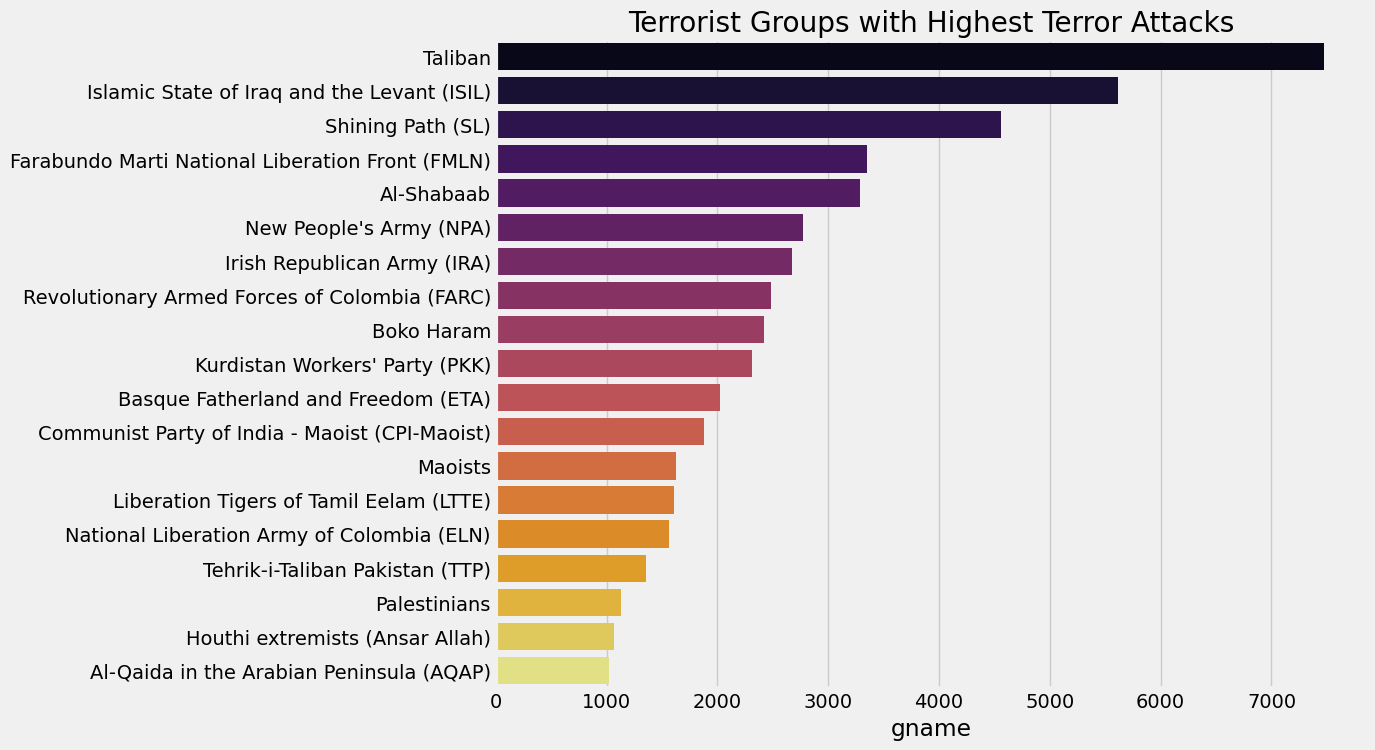

In [28]:
sns.barplot(x=df1['gname'].value_counts()[1:20],y=df1['gname'].value_counts().index[1:20],palette='inferno')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()


In [53]:
top10g=list(df1['gname'].value_counts().index[1:10])
dftop10g=df1[df1['gname'].isin(top10g)]

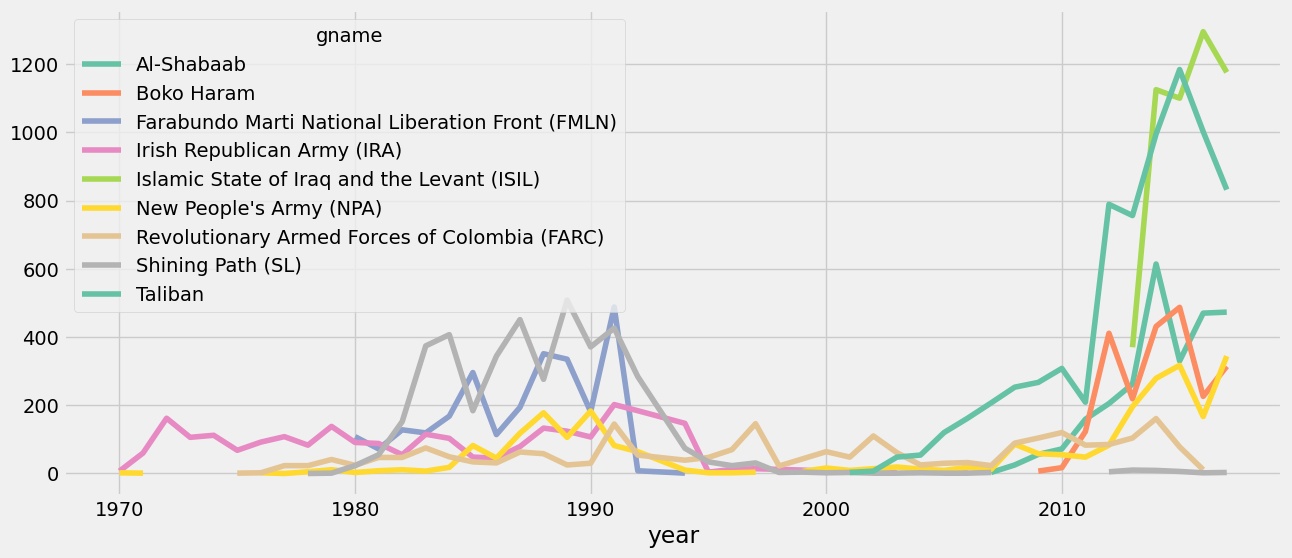

In [54]:
pd.crosstab(dftop10g['year'], dftop10g['gname'], values=dftop10g['nkill'], aggfunc='count').plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.show()


The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing. However, it has probably stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.



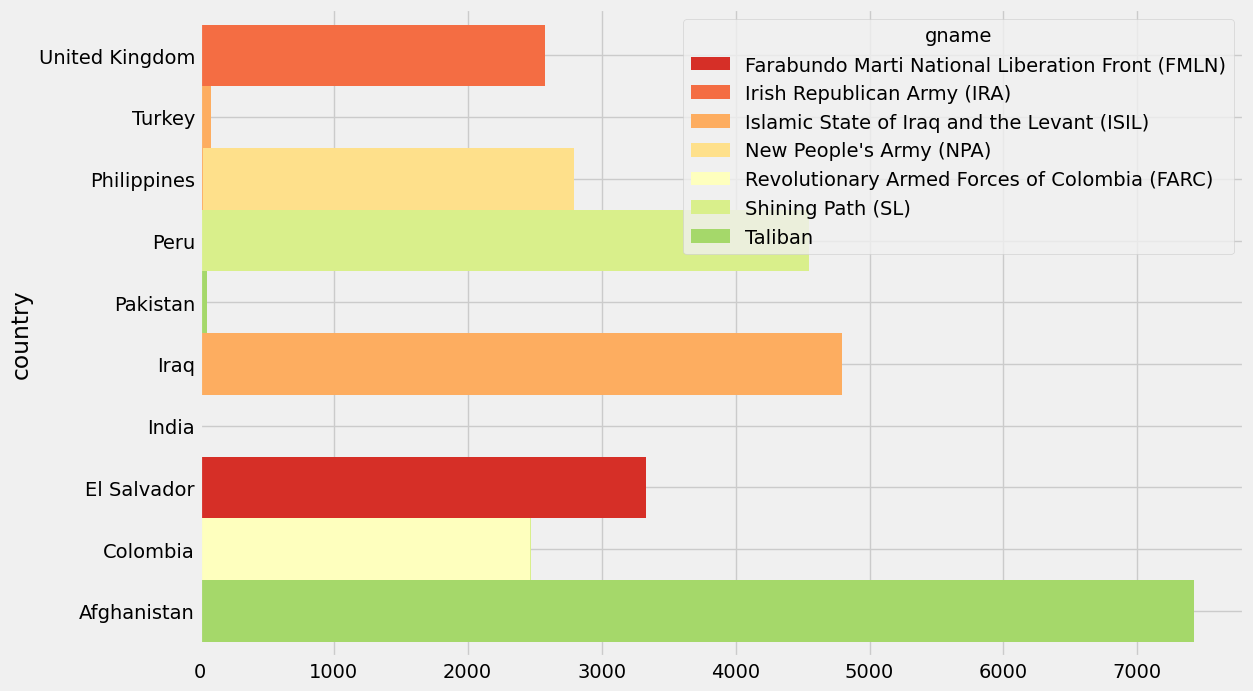

In [55]:
pd.crosstab(dftop10.country,dftop10g.gname).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


### why Pakistan is the second Country in Terrorism but there is no top gang on it?

In [62]:
df1.groupby('country')['gname'].nunique().sort_values(ascending=False)[:20]

country
India                       301
United States               234
Italy                       223
France                      206
Greece                      169
Lebanon                     167
Pakistan                    146
United Kingdom              109
Colombia                    108
Iraq                        100
Spain                       100
Turkey                       96
Israel                       81
Philippines                  80
Bangladesh                   78
Nepal                        74
Libya                        74
Iran                         73
West Bank and Gaza Strip     71
West Germany (FRG)           69
Name: gname, dtype: int64

### Pakistan have alot of gangs but India ,USA too , why Pakistan !!

In [90]:
check = df1[df1['country']=='Pakistan']
ok=list(check['gname'].value_counts().index[1:10])
check=check[check['gname'].isin(ok)]


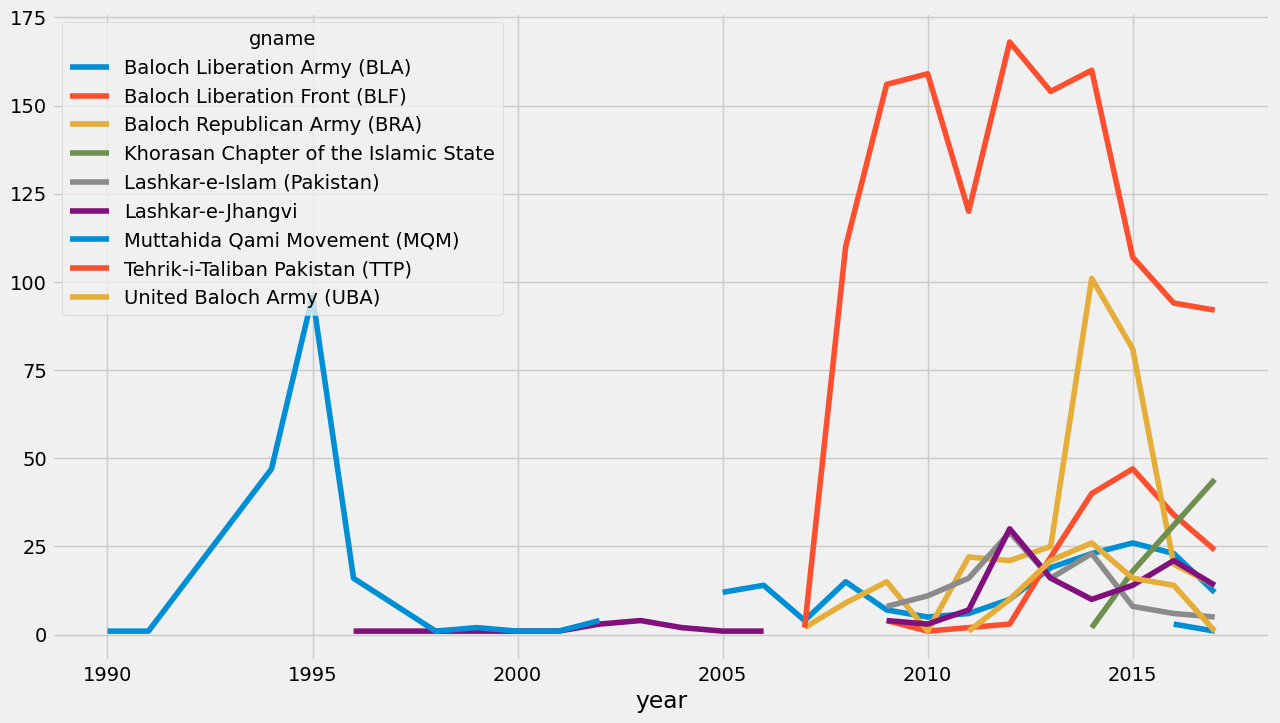

In [91]:
pd.crosstab(check.year,check.gname,values=check.nkill,aggfunc='count').plot()
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()


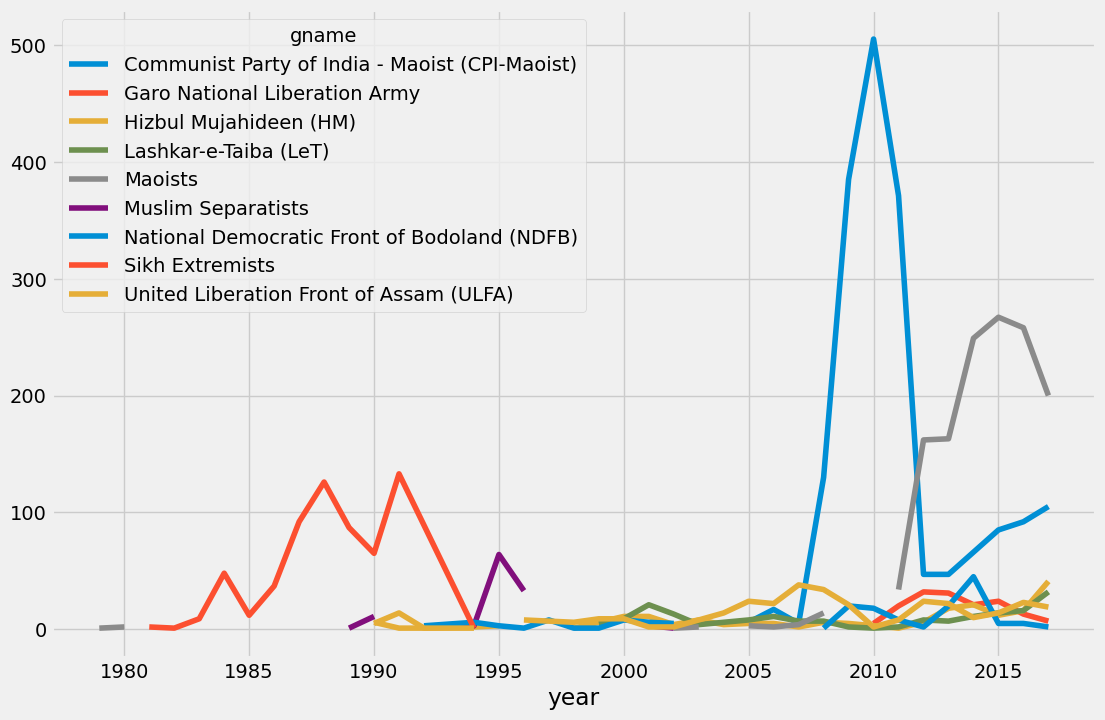

In [92]:
check = df1[df1['country']=='India']
ok=list(check['gname'].value_counts().index[1:10])
check=check[check['gname'].isin(ok)]
pd.crosstab(check.year,check.gname,values=check.nkill,aggfunc='count').plot()
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


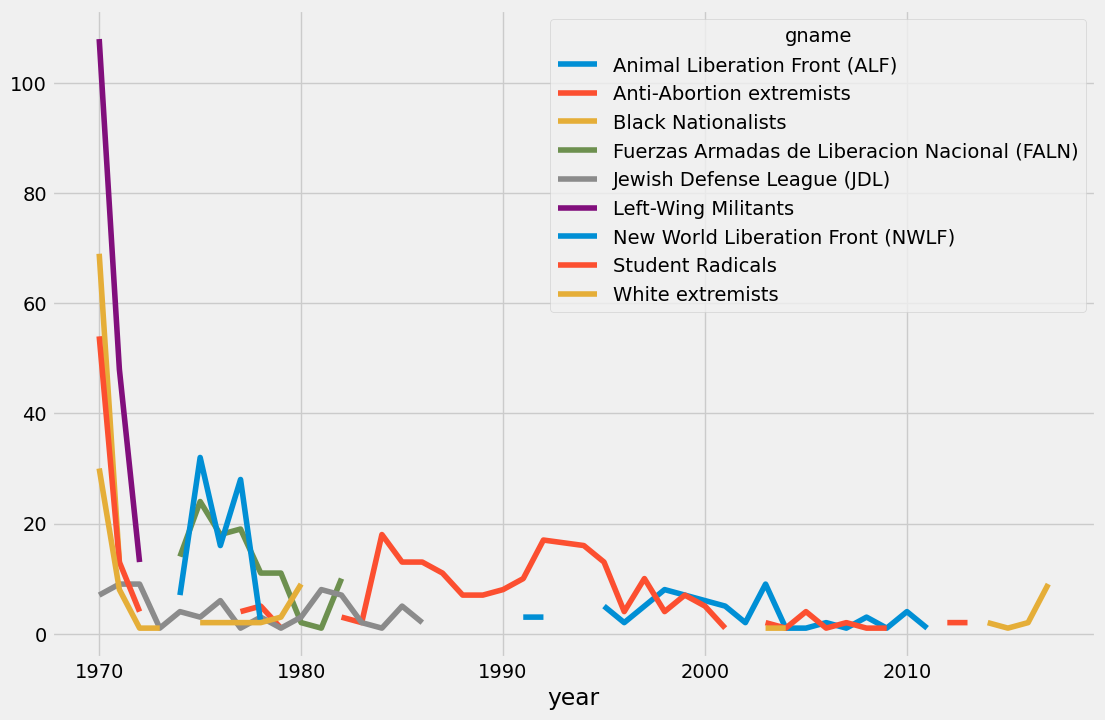

In [93]:
check = df1[df1['country']=='United States']
ok=list(check['gname'].value_counts().index[1:10])
check=check[check['gname'].isin(ok)]
pd.crosstab(check.year,check.gname,values=check.nkill,aggfunc='count').plot()
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


### From the above graphs , that's true india and usa have gang more than pakistan , but the gangs in pakistan is more active , they killed more

Conclusion :
1. Most attacks in Country - Iraq
2. Most attacks in City - Baghdad
3. Most attacks in Region - Middle East & North Africa
4. Least attacks in Region - Australasia & Oceania
5. Most attacks in year - 2014
6. Most attacks by Group - Taliban
7. Most attacks type - Bombing/Explsion
8. Most target type by terriorst - Private Citizens/Property

